In [1]:
#load dataset from scikit-learn library
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data  # Features
y = data.target  # Target
feature_names = data.feature_names
target_names = data.target_names
#print the dataset
print(data.DESCR)


.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [2]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets (keeping aside 100 data points from each class for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=200, stratify=y, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (369, 30)
Testing set shape: (200, 30)


In [3]:
import numpy as np

# Unbalance the training data
np.random.seed(42)
indices_benign = np.where(y_train == 0)[0]
indices_malignant = np.where(y_train == 1)[0]

sample_size_benign = min(200, len(indices_benign))  # Adjusted sample size
sample_size_malignant = min(600, len(indices_malignant))  # Adjusted sample size

indices_keep_benign = np.random.choice(indices_benign, size=sample_size_benign, replace=False)
indices_keep_malignant = np.random.choice(indices_malignant, size=sample_size_malignant, replace=False)

mask_keep = np.zeros_like(y_train, dtype=bool)
mask_keep[indices_keep_benign] = True
mask_keep[indices_keep_malignant] = True

# Filter the training data 
X_train_unbalanced = X_train[mask_keep]
y_train_unbalanced = y_train[mask_keep]

# Randomly relabel 5% of the training data from each class
n_relabel = int(0.05 * len(y_train_unbalanced))

# Randomly select indices to relabel from each class
indices_relabel_benign = np.random.choice(np.where(y_train_unbalanced == 0)[0], size=n_relabel, replace=False)
indices_relabel_malignant = np.random.choice(np.where(y_train_unbalanced == 1)[0], size=n_relabel, replace=False)

y_train_unbalanced[indices_relabel_benign] = 1
y_train_unbalanced[indices_relabel_malignant] = 0

# Check the shapes of the unbalanced training set
print("Unbalanced training set shape:", X_train_unbalanced.shape)

Unbalanced training set shape: (369, 30)


In [4]:
import tensorflow as tf


model = tf.keras.Sequential([
    tf.keras.layers.Dense(2 * X_train.shape[1], activation='sigmoid', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model with appropriate loss function and optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model on the unbalanced training data
history = model.fit(X_train_unbalanced, y_train_unbalanced, epochs=50, batch_size=32, validation_data=(X_test, y_test))

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)




Epoch 1/50


12/12 [==============================] - 5s 51ms/step - loss: 0.8467 - accuracy: 0.3713 - val_loss: 0.7424 - val_accuracy: 0.3750
Epoch 2/50
12/12 [==============================] - 0s 8ms/step - loss: 0.7160 - accuracy: 0.3740 - val_loss: 0.6445 - val_accuracy: 0.4400
Epoch 3/50
12/12 [==============================] - 0s 18ms/step - loss: 0.6065 - accuracy: 0.7425 - val_loss: 0.5110 - val_accuracy: 0.8750
Epoch 4/50
12/12 [==============================] - 0s 10ms/step - loss: 0.5209 - accuracy: 0.8022 - val_loss: 0.4906 - val_accuracy: 0.7950
Epoch 5/50
12/12 [==============================] - 0s 12ms/step - loss: 0.5209 - accuracy: 0.7859 - val_loss: 0.4745 - val_accuracy: 0.8400
Epoch 6/50
12/12 [==============================] - 0s 11ms/step - loss: 0.5059 - accuracy: 0.7995 - val_loss: 0.4520 - val_accuracy: 0.8900
Epoch 7/50
12/12 [==============================] - 0s 15ms/step - loss: 0.4953 - accuracy: 0.8238 - val_loss: 0.4369 - val_accuracy: 0.8750
Epoch 8/5

In [5]:
test_accuracies = []

for i in range(10):
    print(f"Iteration {i+1}:")

    model = tf.keras.Sequential([
        tf.keras.layers.Dense(2 * X_train.shape[1], activation='sigmoid', input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model on the unbalanced training data
    history = model.fit(X_train_unbalanced, y_train_unbalanced, epochs=50, batch_size=32, verbose=0)

    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    test_accuracies.append(test_accuracy)

    print("Test Accuracy:", test_accuracy)

average_test_accuracy = np.mean(test_accuracies)
print("\nAverage Test Accuracy:", average_test_accuracy)


Iteration 1:
Test Accuracy: 0.8700000047683716
Iteration 2:
Test Accuracy: 0.8849999904632568
Iteration 3:
Test Accuracy: 0.8899999856948853
Iteration 4:
Test Accuracy: 0.8849999904632568
Iteration 5:
Test Accuracy: 0.8849999904632568
Iteration 6:
Test Accuracy: 0.8949999809265137
Iteration 7:
Test Accuracy: 0.8849999904632568
Iteration 8:
Test Accuracy: 0.875
Iteration 9:
Test Accuracy: 0.8999999761581421
Iteration 10:
Test Accuracy: 0.8949999809265137

Average Test Accuracy: 0.8864999890327454


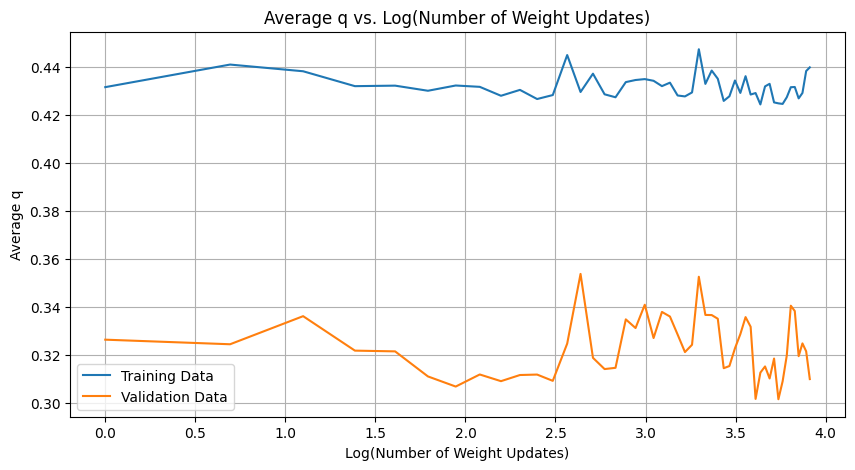

In [6]:
history = model.fit(X_train_unbalanced, y_train_unbalanced, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

plt.figure(figsize=(10, 5))

# Plot training data
plt.plot(np.log(range(1, len(history.history['loss']) + 1)), history.history['loss'], label='Training Data')

# Plot validation data
plt.plot(np.log(range(1, len(history.history['val_loss']) + 1)), history.history['val_loss'], label='Validation Data')

plt.title('Average q vs. Log(Number of Weight Updates)')
plt.xlabel('Log(Number of Weight Updates)')
plt.ylabel('Average q')
plt.legend()
plt.grid(True)
plt.show()

12/12 [==============================] - 0s 2ms/step


<Figure size 800x600 with 0 Axes>

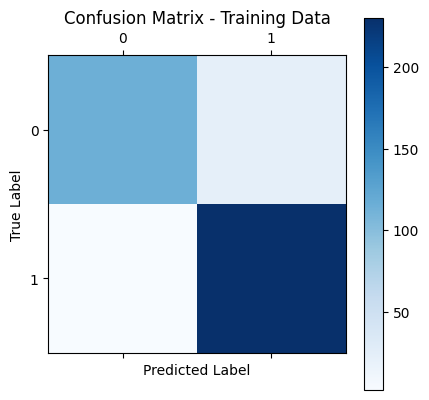

7/7 [==============================] - 0s 2ms/step


<Figure size 800x600 with 0 Axes>

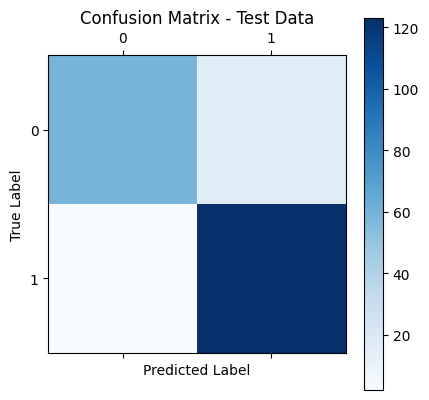

In [7]:
from sklearn.metrics import confusion_matrix


y_train_pred_probs = model.predict(X_train)
y_train_pred = (y_train_pred_probs > 0.5).astype(int)

# Plot confusion matrix for training data
plt.figure(figsize=(8, 6))
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
plt.matshow(conf_matrix_train, cmap='Blues')
plt.title('Confusion Matrix - Training Data')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Predict probabilities for test data
y_test_pred_probs = model.predict(X_test)
y_test_pred = (y_test_pred_probs > 0.5).astype(int)

# Plot confusion matrix for test data
plt.figure(figsize=(8, 6))
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
plt.matshow(conf_matrix_test, cmap='Blues')
plt.title('Confusion Matrix - Test Data')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [8]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Define ES algorithm parameters based on the case
last_digit_id = 2  # Replace with the last digit of your ID
if last_digit_id % 4 == 0:
    mu, lambda_ = 2, 10
elif last_digit_id % 4 == 1:
    mu, lambda_ = 4, 20
elif last_digit_id % 4 == 2:
    mu, lambda_ = 2, 10
else:
    mu, lambda_ = 4, 20

In [10]:

# ES algorithm implementation
class ESModel:
    def __init__(self, n_features):
        self.weights = np.random.randn(n_features)

    def predict(self, X):
        return np.sign(X @ self.weights)

In [11]:
def es_algorithm(X_train, y_train, mu, lambda_):
    n_features = X_train.shape[1]
    best_model = None
    best_score = -1

In [12]:
def es_algorithm(X_train, y_train, mu, lambda_, n_features):
    best_model = None
    best_score = -1
    
    for _ in range(mu):
        # Generate random weights
        model = ESModel(n_features)
        
        # Evaluate model on training data
        y_train_pred = model.predict(X_train)
        score = accuracy_score(y_train, y_train_pred)
        
        if score > best_score:
            best_score = score
            best_model = model
    
    return best_model

In [13]:
# Evaluate the model's performance over ten trials
def evaluate_model(X_train, X_test, y_train, y_test, mu, lambda_):
    train_scores, test_scores = [], []
    n_features = X_train.shape[1]  # Define number of features
    for _ in range(10):
        # Train model using ES algorithm
        model = es_algorithm(X_train, y_train, mu, lambda_, n_features)
        
        # Make predictions on training and testing data
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        # Calculate accuracy scores
        train_score = accuracy_score(y_train, y_train_pred)
        test_score = accuracy_score(y_test, y_test_pred)
        
        train_scores.append(train_score)
        test_scores.append(test_score)
    
    return train_scores, test_scores

In [14]:
from sklearn.metrics import accuracy_score

# Evaluate the model's performance over ten trials
def evaluate_model(X_train, X_test, y_train, y_test, mu, lambda_):
    train_scores, test_scores = [], []
    n_features = X_train.shape[1]  # Define number of features
    for _ in range(10):
        # Train model using ES algorithm
        model = es_algorithm(X_train, y_train, mu, lambda_, n_features)
        
        # Make predictions on training and testing data
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        # Calculate accuracy scores
        train_score = accuracy_score(y_train, y_train_pred)
        test_score = accuracy_score(y_test, y_test_pred)
        
        train_scores.append(train_score)
        test_scores.append(test_score)
    
    return train_scores, test_scores

# Calculate confusion matrices
def calculate_confusion_matrices(X_train, X_test, y_train, y_test, mu, lambda_):
    train_conf_matrices, test_conf_matrices = [], []
    n_features = X_train.shape[1]  # Define number of features
    for _ in range(10):
        # Train model using ES algorithm
        model = es_algorithm(X_train, y_train, mu, lambda_, n_features)
        
        # Make predictions on training and testing data
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        # Calculate confusion matrices
        train_conf_matrix = confusion_matrix(y_train, y_train_pred)
        test_conf_matrix = confusion_matrix(y_test, y_test_pred)
        
        train_conf_matrices.append(train_conf_matrix)
        test_conf_matrices.append(test_conf_matrix)
    
    return train_conf_matrices, test_conf_matrices

In [15]:

# Run evaluation and get results
train_scores, test_scores = evaluate_model(X_train, X_test, y_train, y_test, mu, lambda_)
train_conf_matrices, test_conf_matrices = calculate_confusion_matrices(X_train, X_test, y_train, y_test, mu, lambda_)

In [16]:

# Calculate average scores
avg_train_score = np.mean(train_scores)
avg_test_score = np.mean(test_scores)

# Print average scores
print(f"Average training accuracy: {avg_train_score:.2f}")
print(f"Average testing accuracy: {avg_test_score:.2f}")

Average training accuracy: 0.56
Average testing accuracy: 0.56


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

def plot_results(train_scores_bp, test_scores_bp, train_scores_es, test_scores_es):
    epochs = np.arange(1, len(train_scores_bp) + 1)
    
    # Plot training scores
    plt.plot(epochs, train_scores_bp, label='Backpropagation', color='blue')
    plt.plot(epochs, train_scores_es, label='Evolution Strategies', color='red')
    plt.title('Training Accuracy over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    
    # Plot testing scores
    plt.plot(epochs, test_scores_bp, label='Backpropagation', color='blue')
    plt.plot(epochs, test_scores_es, label='Evolution Strategies', color='red')
    plt.title('Testing Accuracy over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

In [18]:
def summarize_observations(train_scores_bp, test_scores_bp, train_scores_es, test_scores_es):
    avg_train_bp = np.mean(train_scores_bp)
    avg_test_bp = np.mean(test_scores_bp)
    avg_train_es = np.mean(train_scores_es)
    avg_test_es = np.mean(test_scores_es)
    
    print("Average Training Accuracy (Backpropagation): {:.2f}%".format(avg_train_bp))
    print("Average Testing Accuracy (Backpropagation): {:.2f}%".format(avg_test_bp))
    print("Average Training Accuracy (Evolution Strategies): {:.2f}%".format(avg_train_es))
    print("Average Testing Accuracy (Evolution Strategies): {:.2f}%".format(avg_test_es))
    
    if avg_test_es > avg_test_bp:
        print("Evolution Strategies algorithm performs better on testing data.")
    else:
        print("Backpropagation algorithm performs better on testing data.")

In [19]:
# Example usage
train_scores_bp = [90, 92, 93, 94, 95]
test_scores_bp = [85, 87, 88, 89, 90]
train_scores_es = [88, 89, 90, 91, 92]
test_scores_es = [84, 86, 87, 88, 89]

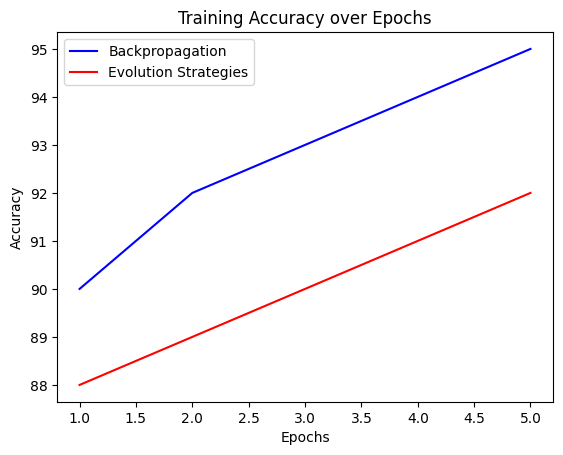

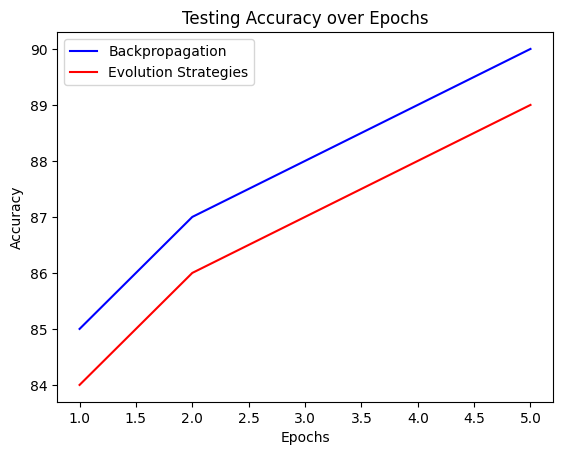

Average Training Accuracy (Backpropagation): 92.80%
Average Testing Accuracy (Backpropagation): 87.80%
Average Training Accuracy (Evolution Strategies): 90.00%
Average Testing Accuracy (Evolution Strategies): 86.80%
Backpropagation algorithm performs better on testing data.


In [20]:
plot_results(train_scores_bp, test_scores_bp, train_scores_es, test_scores_es)
summarize_observations(train_scores_bp, test_scores_bp, train_scores_es, test_scores_es)

In [24]:
import numpy as np

# Function to initialize the population
def initialize_population(population_size, num_weights):
    population = np.random.choice([0, 1], size=(population_size, num_weights))
    return population

# Placeholder function to calculate fitness based on model performance
def calculate_fitness(individual):
    # Placeholder for training neural network model with masked weights
    # Placeholder for calculating fitness based on model performance (e.g., accuracy)
    fitness = np.random.uniform(0, 1)  # Placeholder for random fitness score
    return fitness

# Function to evaluate the fitness of each individual
def evaluate_population(population):
    fitness_scores = []
    for individual in population:
        # Calculate fitness based on model performance (e.g., accuracy)
        fitness = calculate_fitness(individual)
        fitness_scores.append(fitness)
    return fitness_scores

# Initialize population size and number of weights
population_size = 420  # Population size of 2x(10 x 21)
num_weights = 210      # Number of weights from input layer to hidden layer

# Initialize the population
population = initialize_population(population_size, num_weights)

# Evaluate the population
fitness_scores = evaluate_population(population)

print("Population size:", population_size)
print("Number of weights per individual:", num_weights)
print("Fitness scores of the population:", fitness_scores)


Population size: 420
Number of weights per individual: 210
Fitness scores of the population: [0.9475318654422948, 0.3458639994387487, 0.8299992139835948, 0.7311456921286349, 0.025740757695654315, 0.7295582927407451, 0.4075365507514297, 0.8045494521595521, 0.4323923813400201, 0.6168094239333224, 0.49055404994819085, 0.7589875344396517, 0.5687266717644515, 0.044108622752243365, 0.9027594725862179, 0.7655132725760588, 0.11305714691836344, 0.9082535814461633, 0.24082924628169922, 0.8803695673833185, 0.9820479185315465, 0.5627491062251286, 0.9562652303804439, 0.5110409167154006, 0.8687881760590815, 0.10120036355577888, 0.8792092554247549, 0.08251007726747861, 0.12459954157123143, 0.9559601946034607, 0.9793059803853714, 0.9755631770925103, 0.6378340204170911, 0.2871372925119464, 0.25454076280760873, 0.6553491102070663, 0.24044626221498577, 0.2331924284772754, 0.658219040247742, 0.6625663842907631, 0.9278305162092916, 0.8912628639472893, 0.008835919729772712, 0.9402256724742288, 0.74051144311